In [78]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

**이전 수업시간 실습 이어서 - 콩쥐팥쥐 TextRank**

(참고 링크)
https://github.com/Apress/text-analytics-w-python-2e/blob/master/Ch06%20-%20Text%20Summarization%20and%20Topic%20Models/Ch06e%20-%20Document%20Summarization.ipynb

In [79]:
DOCUMENT = """
조선 시대 중엽, 전라도 전주 서문 밖에 최만춘이라는 한 퇴직 관리가 아내 조씨와 이십여 년을 같이 살아왔건만 슬하에 자식이 없어 근심하며 기도와 불공도 하고 곤궁한 사람에게 적선도 하였는데, 그러는 사이에 하늘이 감동하였는지 하루는 부부가 신기한 꿈을 얻고 이내 부인에게 태기가 있었다.
 
열 달이 차자 갑자기 그윽한 향기가 방 안에 감돌며 문득 한 옥녀를 낳았으니, 딸아이의 이름을 콩쥐라 지어 애지중지 길렀다. 그러나 그 모친의 천명이 그만이었던지 조물주의 시기함인지 콩쥐가 태어난 지 겨 백일 만에 조씨 부인이 세상을 하직하게 되니, 최만춘은 뜻하지 않게 중년에 홀아비 신세가 되어 버렸다.
 
만춘은 외롭고 쓸쓸할 때면 죽은 아내를 생각하여 눈물을 흘리며 어린 콩쥐를 안고 다니면서 동네 아낙네들의 젖을 얻어먹였다. 그러나 하루 이틀도 아니고 일 년을 그랬으니 그 고생이 어떠하였을 것인가? 철 모르는 콩쥐가 젖 찾는 소리를 죽은 어미의 혼이 만약 있어 들었다면 그 흘리는 눈물이 변하여 비라도 되었으리라.
 
하루는 콩쥐가 으슥한 깊은 밤에 빈 방에서 두 팔을 허우적거리며 어미를 찾으니 최만춘의 마음은 그대로 녹는 듯하였다. 그러나 그런 고생도 한 해가 가고 두 해가 가니, 쉬지 않고 흐르는 것이 세월이라, 어린 콩쥐의 나이 십여 세에 이르게 되었다. 그러자 오히려 이제는 고생이 호강으로 바뀌어 그 딸이 지은 밥을 먹고 그 딸이 지은 옷을 입게 된 것이다.
 
콩쥐가 열네 살이 되던 해에 최만춘은 배씨라는 과부를 얻어 금실의 즐거움을 얻게 되었다. 그리하여 최만춘은 모든 집안일을 배씨에게 맡기고 살림이 어떻게 되어 가는지 몰랐다. 이 때부터 콩쥐는 남 모르게 고생을 하게 되었고 설움이 아니면 날을 보내지 못하는 신세가 된 것이다.
 
원래 배씨는 시집을 갔다가 팥쥐라는 딸 하나를 낳은 후 남편을 여의고 과부가 되었는데, 좋은 중매로 최씨의 가문에 들어온 터였다. 그러나 천성이 요사 간악 사특하였으며, 그 딸 팥쥐 역시 마음이 곱지 못하고 얼굴조차 덕스럽지 못하였다. 그런만큼 터무니없는 모함으로 고자질하기가 일쑤요, 콩쥐가 못 되는 것을 자기가 잘 되는 것보다 상쾌하게 생각하였다. 그리하여 모녀 사이에 소곤거림이 그치면 콩쥐의 신변에는 참혹한 일이 벌어졌으나 그 부친은 한번 배씨가 눈에 든 다음부터는 배씨의 말이라면 팥으로 매주를 쑨다 해도 곧이듣게 되니, 허물없는 콩쥐를 오히려 구박하여 마지아니하였다.
 
하루는 배씨가 두 딸을 불러 놓고,
 
"시골 사는 계집애가 농사일을 몰라서는 목구멍에 밥알이 들어가지 않으니 콩쥐는 오늘부터 들판으로 김을 매러 다녀라. 팥쥐는 너보다 한 살 덜 먹었고 아직 어린것이라 어찌 김을 맬 수 있으랴만 그렇다고 집에 있으면 콩쥐가 제 자식만 사랑한다 할 것이니, 팥쥐 너도 오늘부터 김을 매러 다니도록 해라."
 
하고 팥쥐에게는 쇠호미를 주어 집 근처 모래밭을 매게 하고, 콩쥐에게는 나무호미를 주어 산비탈에 있는 자갈밭을 매게 하는 것이었다.
 
콩쥐는 점심도 얻어먹지 못하고 호미도 나무로 만든 것이라 밭 한 고랑도 못 매어서 목이 부러져 버리니, 마음씨 나쁜 계모로 말미암아 기를 펴지 못하는 콩쥐의 마음이야 어찌 다 형언할 수 있으랴? 집에 돌아가면 호미를 부러뜨린 것도 죄목이 될 것이며 김을 얼마 매지 못한 것도 허물이 될 터이니 저녁은 별수없이 굶게 될 형편이다. 어리고 약한 마음에 천지가 아득하여져 어찌할 줄을 모르고 울고만 있었다.
 
그럴 즈음 홀연히 하늘에서 검은 소 한 마리가 내려오더니 콩쥐를 보고 묻는 것이었다.
 
"너는 무슨 일이 있기에 그토록 우는냐? 내게 자세한 이야기를 해 보아라."
 
콩쥐가 전후 일을 이야기하자 검은소가 말하였다.
 
"그렇다면 너는 곧장 하탕에 가서 발 씻고, 중탕에 가서 손 씻고, 상탕에 가서 낯 씻고 오너라."
 
콩쥐는 그 말대로 손발과 얼굴을 씻고 한참 후에 돌아왔다. 그러자 검은 소는 좋은 호미와 온갖 과실을 치마폭에 싸 주고는 홀연히 사라져 버리는 것이었다.
 
콩쥐는 그것을 받았으나 아버지께도 보여 드리고 어머니께도 이야기하며 팥쥐와도 똑같이 나누어 먹겠다는 생각으로 하나도 입에 넣지 않았다. 그리고 잠시 동안에 몇 마지기 밭을 매어 놓고 집으로 돌아왔다. 그러나 벌써 문은 굳게 닫혀 있었고, 안에서는 저녁밥을 지어 팥쥐와 함께 앉아 맛있게 먹고 있는 것 같았다.
 
콩쥐는 과실을 문 틈으로 죄다 들이밀고서야 안으로 들어갈 수 있었다. 그러나 그것뿐이라면 오히려 괜찮겠으나 통째로 빼앗긴 그 과실로 말미암아 도리어 콩쥐의 신상에 큰 액운이 덮치게 되었다. 대번에 배씨의 호령이 떨어졌던 것이다.
 
"콩쥐야, 이 년! 이리 오너라. 네 이 년, 어른이 시켜서 김인지 뭔지 매러 갔으면 일찍 마치고 돌아와서 밥도 먹고 또 다른 일도 해야 할 게 아니야, 그래 여태껏 무엇을 했느냐? 그리고 과실은 어디서 났단 말이냐? 이게 분명 불공에 쓰는 과실 같은데 저 년이 분명 아무 절 중놈에게 얻은 것이지!

네 그렇지 않고서야 어디서 났단 말이냐? 계집애년이 나이 열댓살 가까워오니까 벌써부터 지나가는 행인을 홀려 먹는단 말이냐? 이런 일을 너의 아버지께서 알아 봐라! 큰일이 나지 않겠느냐? 얘 팥쥐야. 이걸 빨리 먹어 버리고 아버지 눈에 띄지 않게 해라.눈에 띄는 날이면 언니 년은 죽는 날이다. 언니는 실컷 먹었을 터이니 그만두고 너나 얼른 먹어치워라."
 
콩쥐는 밥도 얻어먹지 못하고 그 날 밤을 눈물로 새웠다.
 
그로부터 콩쥐에게는 뜻밖의 일과 새로운 고생만이 끊임없이 닥쳐왔다. 하루는 계모 배씨가 콩쥐에게 새로운 일을 시키는 것이었다.
 
"오늘은 부엌의 빈 독에 물을 길어다 채워 놓아라."
 
콩쥐는 그 말대로 물을 길어다 부었다. 그러나 아무리 길어다 부어도 어찌된 독인지 차지를 않았다. 아침부터 진종일 물을 길어 나르다 보니 기운이 빠져서 진땀이 흐르고 고개가 부러지는 것만 같아서 더 물을 길을 수가 없었다. 그렇다고 물을 채우지 않을 수는 없었다. 그래 다시 방구리를 머리에 얹고 우물로 가려는데 마당 한쪽에서 맷방석만한 두꺼비 한 마리가 엉금엉금 기어오더니 버럭 소리를 질러 말하는 것이었다.
 
"콩쥐야, 콩쥐야. 네 암만 물을 길어 부어도 그 독은 밑빠진 독이라 결코 차지 않을 테니 그렇게 혼자 애쓰지 말고 이르는 대로 해라. 그 옥의 틈이 손가락 하나 들락거릴 만하다. 네가 그 독을 조금 기울여 주면 내가 그 속에 들어가 한동안 수단을 부리겠다."
 
그러나 콩쥐는 백 번 사양하며 듣지 않았다.
 
"내가 타고난 고생을 어찌 남에게 미룰 수 있겠니?"
 
그러자 두꺼비가 성을 버럭 냈다.
 
"나도 그런 생각이 없는 바는 아니나 너같이 마음씨 고운 아이를 너의 계모가 일부러 고생시키려고 하는 것이다. 그런데 나로 말하면 인간과 인연이 깊어 몇백 년 나이를 누리며 살아오고 있는 터이므로 나 같은 늙은 것이 그와 같은 일을 돌보지 않을 수가 없어서 각별히 온 것이다. 그런데 네가 어찌 거절하여 이 늙은 것의 깊은 뜻을 업신여기느냐?"
 
이에 콩쥐는 사례하고 그 물독을 기울여 두꺼비가 엉금엉금 기어 그 밑으로 들어가게 해 주었다. 그리고 독을 바로잡아 놓은 다음 물을 길어다 부으니, 과연 몇 차례 안 해서 독에 물이 가득 찼으므로 계모 배씨에게 물독을 채웠노라고 아뢰니, 배씨는 겉으로 좋아하는 모양을 보였으나 속으로는 이상한 생각을 품지 않을 수 없었다.
 
"저것이 일전에도 난데없는 과실을 얻어오는 게 수상하더니 이번엔 밑빠진 독에 물을 채워 놓았으니, 아무래도 저 년을 그냥 두었다간 큰일나겠다. 도대체 저 년이 어떻게 된 계집애이기에 남이 할 수 없는 일을 해내는 것일까?"
 
그러구려 세월을 보내는데 콩쥐의 외갓집 조씨 댁에서 무슨 잔치가 있어 콩쥐를 불렀다. 그러자 염치도 없고 인사도 모르는 계모 배씨는 큰 마누라 본가 잔치에 무슨 체면으로 나서려는지 콩쥐는 젖혀 놓고 제가 먼저 날뛰는 것이었다.
 
"콩쥐야, 너는 집이나 보도록 해라. 내가 잠시 다녀올 테니 만약 너도 가고 싶거든 베짜던 것이나 마치고 말리던 *겉피 석 섬만 찧어 놓고 오도록 해라."
 
그리고는 비단 저고리를 꺼내 입고 싸두었던 *진신을 꺼내 신고 한동안 수선을 피우며 맵시를 내더니 팥쥐만 데리고 떠났다.
 
하는 수 없이 콩쥐는 혼자 처져서 눈물을 흘리며 겉피 석 섬을 마당에 널어 놓고 베틀 위에 올라앉아서 짤깍짤깍 짜기를 시작하였다. 그러나 무슨 재주로 한 필 베를 짜며 석 섬 겉피를 찧으랴? 콩쥐는 얼마나 울었던지 정신을 못 차릴 지경이었다. 그런데 이게 웬일인가? 콩쥐가 한 번도 보지 못한 예쁜 여인이 찬란한 비단옷을 곱게 차려 입고 신기한 향내를 풍기며 뚜렷한 모습으로 베틀 앞에 다가서며 콩쥐를 보고 베틀에서 내려오기를 재촉하는 것이었다.
 
"내가 비록 재주는 없으나 베틀을 빌린다면 당장에 짜 낼 것이니 아가씨는 곧 떠날 차비를 하도록 하오."
 
콩쥐가 베틀에서 내려오자 부인은 베틀에 올라앉더니 알마 안 가서 짜던 것을 다 마치고 베틀에서 내려오며 말하였다.
 
"아가씨, 이제 일이 끝났으니 어서 외가에 가시오. 또한 도중에서 좋은 기회도 있을 테니 되도록 견디어 보면 차차 고생을 면하고 호강을 누리게 될지도 모르는 일이오."
 
그러고는 한 비단 보자기를 풀어 헤치더니 새로 지은 옷 한 벌과 댕기와 신발까지 새것을 내주면서,
 
"나는 하늘에셔 내려온 직녀로서 상제의 허락을 받고 이와 같이 왔으니 오래도록 머물지 못하오."
 
하고는 얼른 몸을 나려 공중으로 날아가는 것이었다.
 
넋을 잃고 바라보던 콩쥐가 가까스로 정신을 차려 막대기를 집어 들고 일어나서 마당으로 내려가자, 아까부터 겉피 위에 앉아서 겉피를 쪼아 먹던 새 떼가 훌쩍 날아가 버리는데 겉피는 알맹이가 되어 그대로 남아 있었다. 알고 보니 새 떼는 겉피를 쪼아 먹은 게 아니라 껍질을 벗겨 놓았던 것이다.
 
여기서 콩쥐는 건넛마을 외갓집 잔치를 보러 가는데, 때는 바야흐로 춘삼월 좋은 계절이라 여러 가지 아름다운꽃이 모두 스스로 웃기를 마지아니하고 나는 새와 다른 짐승도 각기 그 즐거움을 누리고 있었다. 콩쥐는 또 한 그윽한 감회가 스스로 서려 나는 나비를 희롱하며 웃기도 하고 꽃도 탐내며 두서없는 생각에 잠겨 가는 중에 어느 시냇가에 다다르니 물도 맑고 고기가 떼지어 노니는 것이 볼 만하였다. 콩쥐는 물을 쥐어 손도 씻고 돌도 던져 고기도 놀래 주곤 하였다.
 
이 때 뒤로부터 감사가 도임하는 행차가 위의를 갖추어 오느라고 벽제 소리를 지르면 잡인을 치우는 바람에 콩쥐는 허겁지겁 시냇물을 뛰어 건너려다 그만 잘못하여 신 한 짝을 물 속에 빠뜨리고 말았다. 그러나 무섭고 다급한 마음에 콩쥐는 감히 신을 건져 보려고도 하지 못한 채 외가로 달려갔다. 뒤따른 행차가 그 길을 지나칠 때였다. 감사가 무심히 앞길을 바라보니 이상한 서기가 눈에 띄었다.
 
그래서 부하를 지휘하여 그 서기가 떠도는 언저리를 찾아보게 하였다. 그러나 별다른 것은 없고 다만 개울물속에 신 한 짝이 있을 뿐이다. 감사는 심중으로 매우 기이하게 여겨 부하로 하여금 그 신짝을 간수하도록 일러 두었다. 그리고 도임한 후에 곧이어 신짝 잃어버린 사람을 찾아 각처로 사람을 보냈다.
 
이럴 즈음 콩쥐는 외가에 가서 외삼촌과 외숙모께 절하고 뵈니 그 때까지 못오는 줄 알고 섭섭히 생각하고 있던 외삼촌 내외는 매우 기뻐하며 어머니가 돌아가신 후로 고생이 많음을 진심으로 위로하여 좋은 음식을 갖추어 차려 주는 것이었다. 그러자 계모 배씨의 기색이 좋지 않았다.
 
"콩쥐야, 네 짜던 베는 다 짜고 왔느냐? 말리던 겉피도 다 찧어 놓고 왔느냐? 또 집은 어쩌려고 비워 두고 왔느냐? 그 비단옷은 어디서 훔쳐 입었느냐? 응? 어떤 놈이 네 대신 해 주더냐?"
 
그리고는 남 안 보는 틈틈이 꼬집어 뜯는 것이었다. 콩쥐는 기가 막혀 할 수 없이 그 사이 겪은 바를 낱낱이 아뢰었다. 그러자 콩쥐의 이야기를 듣고 있던 계모는 눈알이 튀어나오며 얼굴색이 청기와처럼 푸르러지니 그 흉악한 속마음을 어찌 다 말할 수 있으랴?
 
그 때는 온 집안이 터지도록 손들이 모여 있었다. 그러므로 이 구석 저 구석에서 콩쥐의불쌍한 이야기를 주고받으며 콩쥐의 행실을 칭송하는 소리가 자자하였다. 그런데 이 때 마침 관가에서 *차사가 나와 동네를 돌아다니며,
 
"이 동네 신 한 짝을 잃은 사람이 있거든 이리 와서 말하고 찾아가거라."
 
하고 외치면서 바로 콩쥐의 외갓집 문전에 이르더니, 잔치에 모인 사람들에게까지 일일이 그 신을 신겨 보는 것이었다. 그러자 배씨가 관차 앞으로 썩 나섰다.
 
"여보시오 관차님네! 그신 임자는 바로 나인데, 그 신짝을 잃고서는 아까운 생각을 참을 길이 없어 간밤에도 잠 한숨 이루지 못하였소. 이리 주시오. 그 신은 어저께 새로 사서 신고 당일로 잃어 버렸소."
 
관차가 물어 보는 것이었다.
 
"그러면 잃어버린 곳은 어디며 어떻게 하다가 잃어버렸단 말이오? 이 신짝은 내가 얻은 바도 아니고 이번에 새로 도임하신 감사 사또께서 노중에서 얻으신 거요. 그 신 임자를 찾아 관가로 데려오라는 분부가 계시니 만일 당신이 잃어버린 게 틀림없다면 이리 와서 신어 보시오."
그리고 신짝을 내놓자 배씨는 버럭 화를 내며 뇌까리고 신발을 빼앗으려 하였다.
 
"아니, 관차님네 내 말 좀 들어 보소! 내 것 잃고 내가 찾아가는데 신어 보기는 무엇을 신어 보란 말이오? 신어 보지 않으면 내 것이 아닐까 싶어 그러시오? 어제 신은 사서 신고 이 집 잔치에 참례하러 오다가 저 건너 벌판에서 잃어버렸소. 그래도 내 말을 못 믿겠소? 여러 말 말고 어서 이리 주시오!"
 
관차는 그 하는 모양을 보고는 주저하였으나 발을 내놓게 하고 그 신을 신겨 보았다. 그러나 발은 중턱까지도 들어가지 않았다. 관차는 그 무엄한 짓을 크게 나무라며 다른 사람들로 하여금 차례로 신어 보게 하였다. 그래도 맞는 사람이 없었다.
 
이윽고 관차들이 다른 곳으로 옮겨가려 하는데, 콩쥐는 천연덕스럽게 하는 체도 않고 구경만 하고 있었다. 그러자 손님으로 와 있던 어느 노부인이 당상에 올라앉아 있다가 관차를 불러 이르는 것이었다.
 
"그 신발을 잃은 사람을 어째서 관가에서 찾는지는 모르나 이 가운데 콩쥐라 하는 아가씨가 그 신발을 잃고 찾으려 하면서도 부끄러워 차마 말씀도 아뢰지 못하는 듯하니, 신 임자를 찾아서 주고 가시오. 그 아가씨는 생전에 처음으로 얻은 신이라 합니다."
 
관차가 그 말을 듣고 콩쥐를 불러 내어 신을 신어 보게 하자, 콩쥐가 부끄러워 낯을 붉히며 간신히 발을 내밀어 얌전한 발부리를 신짝 안에 들여 놓으니 살며시 쏙 들어가 맞는 것이었다. 의심할 바 없는 콩쥐의 신이었다. 관차가 콩쥐에게 허리를 굽혀 절하고서 이내 가마 한 채를 꾸며 가지고 와서는 관가로 들어갈 것을 청하였으나 콩쥐는 아직도 시집가지 않은 처녀의 몸이라 괴이쩍은 생각도 들고 무서운 생각도 없지 않아 외삼촌께 말씀을 여쭙고 동행키로 하였다.
 
콩쥐의 가마가 관가에 당도하자 관문 앞에서 사채를 치우고 외삼촌이 먼저 안으로 들어갔다. 감사는 소식을 고대하던 참이라 신짝을 잃은 처녀가 삼문 밖에 대령하였다는 말을 듣고 적이 놀라는 기색이었다.

이번에 새로 도임한 감사는 성이 김씨였다. 김감사는 일찍이 아들 하나 두지 못하고 부인을 잃은 고적한 신세였다. 부인이 별세한 후로는 첩도 두지 않고 스스로 마음을 가다듬어 가며 세월을 보내고 있었다. 그런만큼 자연 신기한 것을 즐겨 연구하는 성벽이 생겨 조그마한 일일지라도 눈에 띄고 귀에 들리는 것이 기이하게 여겨지면 기어이 알아 내고야 말았다.
 
도임하던 그 날만 하더라도 이상한 서기를 보고 또 그 곳에서 새신짝을 얻었으므로 호기심에서 그 신 임자를 만나 보았으면 하였던 것인데, 뜻밖에도 신 임자를 찾으러 나갔던 관차가 관령만을 중히 여긴 나머지 남의 집 처녀를 데려왔다고 하므로 김감사는 매우 놀랐다.
그래서 감사는,
 
"어떤 처녀이기에 신짝에게 그토록 서기가 생기는가?"
 
하고 자세한 연유를 그 외삼촌에게 물었으나 외숙 되는 사람도 서기가 난 까닭에 대해서는 뭐라 대답할 수 없었으므로 결국 콩쥐로 하여금 친히 대답하도록 하였다.
콩쥐는 모친의 상사를 당한 일로부터 시작하여 계모 배씨가 들어온 이후에 있었던 그 동안의 일을 낱낱이 아뢰었다.
감사는 놀라는 한편 기뻐하며 이윽고 그 외숙에게 콩쥐와 혼인할 뜻을 밝히고 그 의사를 물었다.
 
"저로서야 여찌 복종을 하지 않을 수 있겠습니까만 그러나 질녀의 부친이 있으니 일단 물러가 상의하고 다시 돌아와 아뢰겠습니다."
 
최만춘으로서야 콩쥐의 영화를 싫어할 리 만무한 것이었다. 곧 혼인을 승낙하며 한편 택일을 서둘러서 감사의 재취 부인으로 온갖 예를 갖추어 콩쥐를 시집보내게 된 것이다.
 
그런데 배씨는 당초에 제가 잘 되어 영화를 누려 볼 요량으로 전날 관차를 속여 제가 잃어버린 신이라 하고 콩쥐의 복을 빼앗으려 하다가 발각되어 무안을 당한 후로는 콩쥐를 미워하는 마음이 더욱 심하여졌고, 팥쥐도 또한 샘이 북받쳐 이를 벅벅 갈면서 기회가 오기를 벼르고 있었다.
 
"콩쥐 저 년이 지금은 저렇게 고운 옷에 단장을 하고서 감사의 부인이 되어 가지만 네가 내 솜씨 앞에서 어차피 엉덩이를 벌리고 앉아서 편안하게 호강은 못 하리라."
 
하루는 벌써 석류꽃이 한철을 지났고 쓰르라미가 목을 가다듣어 우는 소리에 문득 세월이 빠름을 깨닫고는 서둘러 조처하여 보리라는 생각이 치밀어오른 팥쥐는 감영 살림채로 콩쥐를 보러 들어갔다.
그 때 사또는 공청에 나가고 다만 홀로 콩쥐가 좋은 옷을 입고 아담하게 꾸며 놓은 후원 연못가의 별당에서 나간에 의지하여 힘있게 솟아 오른 연꽃을 구경하고 있었다. 팥쥐는 거짓으로 반색을 하며 달려들어 눙치는 것이었다.
 
"에구머니, 형닌 그 동안 혼자서만 편안히 지내셨구려? 보기 싫은 이 팥쥐는 형님이 출가하신 후 시시로 형님 생각이 간절하고 어떻게 지내시는지 궁금하여 형님을 보러 왔소. 내가 전엔 철없이 형님한테 응석처럼 한 노릇인데 지금 생각하면 잘못한 것 같아 그 뉘우침이 뼈에 사무친답니다. 그렇더라고 형님은 그런 것을 속에다 품어두시지 마시오. 우리 형제가 범연하게 지내지는 맙시다."
 
본래 악의가 없는 사람은 속기를 잘하는 법이다. 콩쥐는 그 말을 듣더니 역시 마음이 움직이는 것이었다.
 
'저것이 아무리 그 전엔 나를 그토록 모해했더라고 그 때는 철을 모를 때요, 이젠 나이가 들어 깨달은 바 있기에 저토록 사과하는 것이니 기특한 일이다.'
이렇게 생각하고는 콩쥐는 좋은 음식도 대접하고 살아가는 형편도 물어보고 하면서 집안 구경도 시켜 주는 것이었다.
 
이 때 팥쥐는 외양과는 달리 내심으로는, '콩쥐, 저 년을 어떻게 하면 움도 싹도 없어지게 할꼬?' 하는 간악한 심술이 북받쳐 뱃속으로 온갖 꾀를 꾸며가며 콩쥐를 따라 별의별 화초와 온갖 화초를 구경하다가 연당 앞에 이르자 문득 한 묘계를 생각해 내고 목욕하자고 권하였다. 그리하여 콩쥐와 팥쥐는 옷을 못가에 벗어 놓고 연못으로 들어가 목욕을 하게 되었다.
 
팥쥐는 슬금슬금 콩쥐를 깊은 곳으로 끌고 가서 별안간 연못 속으로 밀어 넣었다. 워낙 순식간의 일이었다. 그러니 어쩔 도리 없이 콩쥐는 그대로 물 속으로 가라앉아 버렸다. 슬프다! 콩쥐가 겨우 잡은 부귀 영화를 마음껏 누려 보기도 전에 이렇듯 연못 귀신이 되고 말 줄이야 누가 꿈엔들 알았으랴?
간특하고 요사스럽고 악한 팥쥐는 콩쥐가 물 속으로 들어간 채 물거품만 두어 번 솟구쳐올렸을 뿐 이내 그대로 잠잠해지는 것을 제 눈으로 보고서야 마음이 통쾌해져서,
 
"이렇게 쉽게 내 계교대로 되는 것을 쓸데없이 오랫동안 마음을 썩였구나!"
 
라고 뇌까리면서 입가에 웃음을 띄며 급히 밖으로 나와서는 콩쥐의 옷을 제가 주워입고 제 옷을 거두워 치워 버린 다음 태연한 모습으로 마치 콩쥐인 양 별당 난간에 의지하여 연꽃을 바라보면서 못내 기뻐하는 것이었다.
 
감사가 이 때 공사를 마치고 내아로 들어가자 계집 하인이,
 
"마님께서는 후원 별당에서 홀로 연꽃을 구경하고 계십니다."
 
하므로 감사는 발길을 후원으로 돌렸다.
 
김감사는 콩쥐를 맞아들인 후로는 공사만 끝나면 콩쥐와 떨어져 있지 않으려고 하던 터였다. 그러므로 홀로 연꽃을 구경하고 잇다는 말을 듣자 자기도 역시 연꽃을 구경하며 아울러 콩쥐가 연꽃을 사랑하는 의취도 들어 보려는 생각에서 급히 별당으로 들어갔다. 그러자 그 때까지 난간에 기대어 꽃구경을 하고 있던 팥쥐가 재빨리 자리에서 일어나 웃음 띈 얼굴로 내려와 맞자 감사도 또한 기쁜 낯으로 부인의 손목을 잡고서 다시 별당 난간으로 올라가 웃으며,

"부인은 연꽃 구경으로 오늘은 얼마나 즐겁소?"

하였다. 그리고 이야기를 하다가 문득 그 얼굴을 보니, 전날의 모습과는 달리 거무티티할 뿐더러 얼기까지 한 것이었다. 그래 크게 놀라 낯빛마저 잃으면서 감사가 그 이유를 물으니 팥쥐는 이렇게 대답하는 것이었다.
 
"종일토록 이 곳에서 서성거리며 영감께서 오시기를 기다려 일광을 쐬어 이토록 검은 빛이 되었습니다. 얽어 보이는 것은 다름아니라 아까 영감께서 들어오시는 줄 알고 허둥지둥 뛰어가다가 그만 발이 걸려 콩 멍석에 엎어지는 바람에 이 모양이 되었습니다."

이 말을 둗자 감사는 늙은 남편인 자기를 부인이 사모함을 고맙게 여겨 여러 말로 위로하며 다만 얼굴이 변한 것만을 애석하게 여길 뿐, 사람이 바뀐 것은 전혀 깨닫지 못하는 것이었다.
 
며칠이 지난 후였다. 하루는 감사가 몸이 불편하여 일찍 공사를 마치고 들어와 연못가를 배회하고 있노라니 못 가운데에 전날 보지 못하던 연꽃 하나가 눈에 띄는 것이었다. 꽃줄기가 유별나게 높이 솟아나 있을 뿐더러 꽃 모양도 신기하여 아름다움이 비길 데 없으므로 노복으로 하여금 그 꽃을 꺾어다가 별당 방문 앞에 꽂아 놓게 하고 감사는 그 꽃을 사랑하여 마지 아니하였다.
 
그러나 팥쥐는 일찍이 깨달은 바 있으므로 그와 같이 큰 꽃이 별안가 그다지도 곱고 아름답게 피어난 것을 보고 심상치 않게 생각하던 중이라, 영감이 그 방을 떠나면 들어가 보곤 하였다. 그런데 참으로 괴상한 것은 팥쥐가 그 방에서 나올 때마다 그 꽃송이 속에 손과도 같은 것이 있는 듯 팥쥐의 머리채를 바당바당 쥐어뜯는 것이었다. 그래 팥쥐는,
 
"요것이 필연 콩쥐년의 귀신이 붙은 것이다."
 
하고 그 꽃을 뽑아다 불아궁이에 처넣었다.
 
그 후 팥쥐는 안심하고 콩쥐의 세간도 마구 뒤지며 제 마음대로 하는데 다시금 이상한 일이 벌어졌다. 바로 이웃에 사는 할멈이 불씨를 얻으려고 감사 댁 내아로 들어와 예전부터 감사 부인과는 친숙한 터라 연못가 별당으로 가서 아궁이에서 불을 떠가려 하였다.
 
그런데 아궁이 속엔 불은 씨도 없이 꺼져 있고 난데없는 오색 구슬이 한 아궁이 가득하므로 노파는 허겁지겁 구슬을 모조리 치맛자락에 쓸어담아 가지고 집으로 돌아와서 반닫이 속에 감추어 두었다. 그랬더니 천만 뜻밖에도 반닫이 속에서 할멈을 부르는 소리가 나는데, 그 소리가 감사 부인의 목소리와 흡사하였다. 노파가 반닫이 문을 열고 보니 감사 부인이 그 속에 들어앉아 있는 게 아닌가. 그리고 노파에게 자기가 죽게 된 전후 사정을 이야기하고는 이어서 한 묘계를 가르쳐 주는 것이었다.
 
노파는 감사 부인이 일러 주는 대로 잔치를 베풀어 거짓으로 자기의 생일이라 하고 김감사를 초대하였다. 김감사가 노파의 집에 와서 젓가락을 드니 한 짝은 길고 한 짝은 짧아 손에 제대로 잡히지 않으므로 노파의 소홀함을 나무라니 노파가 미처 대답도 하기 전에 홀연 병풍 뒤에서 사람의 소리가 있어 대답하는 것이 아닌가.
 
"젓가락 짝이 틀린 것은 그렇게 똑똑히 아시는 양반이 사람짝이 틀린 것은 어째서 그토록 모르시나요?"
 
'내외의 짝이 틀리다니 이 어쩐 말인고?'
 
감사가 속으로 이렇게 생각하다가 그 동안 아내의 거동에 종종 괴상한 일이 있었음을 갑자기 깨닫고 바삐 돌아가 알아보리라 생각하고 급히 자리에서 일어서려 할 때 별안간 병풍 뒤에서 녹의 홍상을 입은 한 미인이 앞으로 나와 감사에게 절하며 묻는 것이었다.
 
"영감께서는 첩을 몰라 보십니까?"
 
감사는 깜짝 놀라 어찌할 바를 모르고 당황하다가 빨리 사연을 말하라고 하였다.
 
"첩은 의붓동생인 팥쥐에게 해를 입어 연못 귀신이 되었습니다. 그러나 기왕 이렇게 되었으니 영감께서는 그 팥쥐와 함께 내내 안녕하시기 바랍니다."
 
감사가 곧 팥쥐를 잡아 문초하며 또한 사람들을 시켜서 연못을 치게 하니, 과연 콩쥐의 시체가 웃는 낯으로 누워 있었다.
 
급히 건져 내어 염습하려 할 때 죽었던 콩쥐가 다시 숨을 돌리며 살아났다. 그러자 그 때 노파의 집에 있던 콩쥐는 홀연히 온데간데없이 사라졌다. 이에모든 관속과 읍내에사는 백성들까지도 이 신기한 일에 놀라지 않는 사람이 없었다.
 
감사는 팥쥐에게 칼을 씌워 하옥시키고 사실을 조정에 보고하였다. 며칠이 지나서 조정에서 하회가 있었다. 감사는 그 하회대로 형리를 시켜 죄인 팥쥐를 수레에 매어 찢어 죽이고 그 송장을 젓으로 담아 항아리 속에 넣고 꼭꼭 봉하여 팥쥐의 어미를 찾아 전하였다.
 
팥쥐 어미는 처음에 팥쥐가 흉계를 품고 콩쥐를 죽이러 들어갈 때 만만 조심하여 아무쪼록 성사하라고 부탁하여 보낸 후에 곧 최만춘을 고추박이처럼 차 버리고 다른 서방을 얻어 갔다. 혹시 있을지도 모르는 후일의 만약의 경우를 생각하여 후환을 미리 막기 위해서였던 것이다.
 
그리고 주야로 팥쥐의 덕을 입고자 기다리고 있던 중에 관가로부터 선물이 왔다고 하므로 팥쥐 어미는 좋아라 하고 내달으며 훗서방을 안으로 불러들이고는 항아리 아가리를 동여맨 노끈을 풀어 보았다. 큰 항아리에 가득 든 것이 모두 젓갈이었다.
 
한편 또 따로 글씨를 쓴 종이가 들어 있었다. 종이에는 이렇게 씌어 있었다.
 
"흉한 꾀로 사람을 죽이는 자는 누구든 이와 같이 젓으로 담그고, 딸을 가르쳐 흉하고 독한 일을 실행케 한 자로 하여금 그 고기를 씹어 보게 하노라."
 
팥쥐 어미는 이 글을 읽고 팥쥐의 소행이 탄로나 결국 죽음을 당했음을 알자 그만 기절하여 자빠졌다. 그리고 팥쥐 어미는 기절한 채 영영 일어나지 못하고 지옥으로 모녀가 서로 손을 잡고 가 버렸다.
 
한편 김감사는 콩쥐에게 자기의 밝지 못했던 허물을 사과하고 이웃 노파에게 상급을 후히 내린 다음 다시 콩쥐와 더불어 다 하지 못한 인연을 이으니 아들 셋을 낳고 딸도 낳아 화락한 나날을 보냈다.

콩쥐의 부친되는 최만춘도 찾아내어 현숙하고 덕이 있는 여자를 얻어 아들딸 낳고 단란한 살림을 이루게 해 주고, 세상 사람들에게 어진 마음씨를 베풀어 어려운 사람에게는 돈과 곡식을 아낌없이 내려 그들을 구제하니, 김감사 내외의 어진 덕을 모든 백성이 칭송해 마지아니하였다.

"""

In [80]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [81]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

그러나 그 모친의 천명이 그만이었던지 조물주의 시기함인지 콩쥐가 태어난 지 겨 백일 만에 조씨 부인이 세상을 하직하게 되니, 최만춘은 뜻하지 않게 중년에 홀아비 신세가 되어 버렸다.
이 때부터 콩쥐는 남 모르게 고생을 하게 되었고 설움이 아니면 날을 보내지 못하는 신세가 된 것이다.
그리하여 모녀 사이에 소곤거림이 그치면 콩쥐의 신변에는 참혹한 일이 벌어졌으나 그 부친은 한번 배씨가 눈에 든 다음부터는 배씨의 말이라면 팥으로 매주를 쑨다 해도 곧이듣게 되니, 허물없는 콩쥐를 오히려 구박하여 마지아니하였다.
하루는 배씨가 두 딸을 불러 놓고, "시골 사는 계집애가 농사일을 몰라서는 목구멍에 밥알이 들어가지 않으니 콩쥐는 오늘부터 들판으로 김을 매러 다녀라.
팥쥐는 너보다 한 살 덜 먹었고 아직 어린것이라 어찌 김을 맬 수 있으랴만 그렇다고 집에 있으면 콩쥐가 제 자식만 사랑한다 할 것이니, 팥쥐 너도 오늘부터 김을 매러 다니도록 해라." 하고 팥쥐에게는 쇠호미를 주어 집 근처 모래밭을 매게 하고, 콩쥐에게는 나무호미를 주어 산비탈에 있는 자갈밭을 매게 하는 것이었다.
콩쥐는 점심도 얻어먹지 못하고 호미도 나무로 만든 것이라 밭 한 고랑도 못 매어서 목이 부러져 버리니, 마음씨 나쁜 계모로 말미암아 기를 펴지 못하는 콩쥐의 마음이야 어찌 다 형언할 수 있으랴?
그러자 검은 소는 좋은 호미와 온갖 과실을 치마폭에 싸 주고는 홀연히 사라져 버리는 것이었다.
콩쥐는 과실을 문 틈으로 죄다 들이밀고서야 안으로 들어갈 수 있었다.
그러나 그것뿐이라면 오히려 괜찮겠으나 통째로 빼앗긴 그 과실로 말미암아 도리어 콩쥐의 신상에 큰 액운이 덮치게 되었다.
하루는 계모 배씨가 콩쥐에게 새로운 일을 시키는 것이었다.
네가 그 독을 조금 기울여 주면 내가 그 속에 들어가 한동안 수단을 부리겠다." 그러나 콩쥐는 백 번 사양하며 듣지 않았다.
그리고 독을 바로잡아 놓은 다음 물을 길어다 부으니, 과연 몇 차례 안 해서 독에 물이 가득 찼으므로 계모 배씨에게 물독을 채웠노라고 아뢰니, 배

In [82]:
print(summarize(DOCUMENT, word_count=75, split=False))

그러자 염치도 없고 인사도 모르는 계모 배씨는 큰 마누라 본가 잔치에 무슨 체면으로 나서려는지 콩쥐는 젖혀 놓고 제가 먼저 날뛰는 것이었다.
그런데 배씨는 당초에 제가 잘 되어 영화를 누려 볼 요량으로 전날 관차를 속여 제가 잃어버린 신이라 하고 콩쥐의 복을 빼앗으려 하다가 발각되어 무안을 당한 후로는 콩쥐를 미워하는 마음이 더욱 심하여졌고, 팥쥐도 또한 샘이 북받쳐 이를 벅벅 갈면서 기회가 오기를 벼르고 있었다.


In [83]:
import nltk

sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

230

In [84]:
#구글링으로 찾았음
stop_words_s = """
아
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면
인젠
이젠
된바에야
된이상
만큼	어찌됏든
그위에
게다가
점에서 보아
비추어 보아
고려하면
하게될것이다
일것이다
비교적
좀
보다더
비하면
시키다
하게하다
할만하다
의해서
연이서
이어서
잇따라
뒤따라
뒤이어
결국
의지하여
기대여
통하여
자마자
더욱더
불구하고
얼마든지
마음대로
주저하지 않고
곧
즉시
바로
당장
하자마자
밖에 안된다
하면된다
그래
그렇지
요컨대
다시 말하자면
바꿔 말하면
즉
구체적으로
말하자면
시작하여
시초에
이상
허
헉
허걱
바와같이
해도좋다
해도된다
게다가
더구나
하물며
와르르
팍
퍽
펄렁
동안
이래
하고있었다
이었다
에서
로부터
까지
예하면
했어요
해요
함께
같이
더불어
마저
마저도
양자
모두
습니다
가까스로
하려고하다
즈음하여
다른
다른 방면으로
해봐요
습니까
했어요
말할것도 없고
무릎쓰고
개의치않고
하는것만 못하다
하는것이 낫다
매
매번
들
모
어느것
어느
로써
갖고말하자면
어디
어느쪽
어느것
어느해
어느 년도
라 해도
언젠가
어떤것
어느것
저기
저쪽
저것
그때
그럼
그러면
요만한걸
그래
그때
저것만큼
그저
이르기까지
할 줄 안다
할 힘이 있다
너
너희
당신
어찌
설마
차라리
할지언정
할지라도
할망정
할지언정
구토하다
게우다
토하다
메쓰겁다
옆사람
퉤
쳇
의거하여
근거하여
의해
따라
힘입어
그
다음
버금
두번째로
기타
첫번째로
나머지는
그중에서
견지에서
형식으로 쓰여
입장에서
위해서
단지
의해되다
하도록시키다
뿐만아니라
반대로
전후
전자
앞의것
잠시
잠깐
하면서
그렇지만
다음에
그러한즉
그런즉
남들
아무거나
어찌하든지
같다
비슷하다
예컨대
이럴정도로
어떻게
만약
만일
위에서 서술한바와같이
인 듯하다
하지 않는다면
만약에
무엇
무슨
어느
어떤
아래윗
조차
한데
그럼에도 불구하고
여전히
심지어
까지도
조차도
하지 않도록
않기 위하여
때
시각
무렵
시간
동안
어때
어떠한
하여금
네
예
우선
누구
누가 알겠는가
아무도
줄은모른다
줄은 몰랏다
하는 김에
겸사겸사
하는바
그런 까닭에
한 이유는
그러니
그러니까
때문에
그
너희
그들
너희들
타인
것
것들
너
위하여
공동으로
동시에
하기 위하여
어찌하여
무엇때문에
붕붕
윙윙
나
우리
엉엉
휘익
윙윙
오호
아하
어쨋든
만 못하다	하기보다는
차라리
하는 편이 낫다
흐흐
놀라다
상대적으로 말하자면
마치
아니라면
쉿
그렇지 않으면
그렇지 않다면
안 그러면
아니었다면
하든지
아니면
이라면
좋아
알았어
하는것도
그만이다
어쩔수 없다
하나
일
일반적으로
일단
한켠으로는
오자마자
이렇게되면
이와같다면
전부
한마디
한항목
근거로
하기에
아울러
하지 않도록
않기 위해서
이르기까지
이 되다
로 인하여
까닭으로
이유만으로
이로 인하여
그래서
이 때문에
그러므로
그런 까닭에
알 수 있다
결론을 낼 수 있다
으로 인하여
있다
어떤것
관계가 있다
관련이 있다
연관되다
어떤것들
에 대해
이리하여
그리하여
여부
하기보다는
하느니
하면 할수록
운운
이러이러하다
하구나
하도다
다시말하면
다음으로
에 있다
에 달려 있다
우리
우리들
오히려
하기는한데
어떻게
어떻해
어찌됏어
어때
어째서
본대로
자
이
이쪽
여기
이것
이번
이렇게말하자면
이런
이러한
이와 같은
요만큼
요만한 것
얼마 안 되는 것
이만큼
이 정도의
이렇게 많은 것
이와 같다
이때
이렇구나
것과 같이
끼익
삐걱
따위
와 같은 사람들
부류의 사람들
왜냐하면
중의하나
오직
오로지
에 한하다
하기만 하면
도착하다
까지 미치다
도달하다
정도에 이르다
할 지경이다
결과에 이르다
관해서는
여러분
하고 있다
한 후
혼자
자기
자기집
자신
우에 종합한것과같이
총적으로 보면
총적으로 말하면
총적으로
대로 하다
으로서
참
그만이다
할 따름이다
쿵
탕탕
쾅쾅
둥둥
봐
봐라
아이야
아니
와아
응
아이
참나
년
월
일
령
영
일
이
삼
사
오
육
륙
칠
팔
구
이천육
이천칠
이천팔
이천구
하나
둘
셋
넷
다섯
여섯
일곱
여덟
아홉
령
영
"""

In [85]:
stop_words = stop_words_s.split()
print(stop_words)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에', '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여', '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에', '틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에

In [86]:
import numpy as np
import re


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    #doc = doc.lower()
    #doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [87]:
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['조선 시대 중엽 , 전라도 전주 서문 최만춘이라는 퇴직 관리가 아내 조씨와 이십여 년을 살아왔건만 슬하에 자식이 없어 근심하며 기도와 불공도 곤궁한 사람에게 적선도 하였는데 , 그러는 사이에 하늘이 감동하였는지 하루는 부부가 신기한 꿈을 얻고 이내 부인에게 태기가 있었다 .',
       '열 달이 차자 갑자기 그윽한 향기가 방 안에 감돌며 문득 옥녀를 낳았으니 , 딸아이의 이름을 콩쥐라 지어 애지중지 길렀다 .',
       '모친의 천명이 그만이었던지 조물주의 시기함인지 콩쥐가 태어난 지 겨 백일 만에 조씨 부인이 세상을 하직하게 되니 , 최만춘은 뜻하지 않게 중년에 홀아비 신세가 버렸다 .'],
      dtype='<U154')

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(1945, 230)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
가고,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가까워오니까,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가는,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가는데,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가는지,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가니,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가다듣어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가다듬어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가득,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가득하므로,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [90]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(1945, 3) (3,) (3, 230)


In [91]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [92]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([5.27924850e-02, 2.61837192e-02, 7.27662410e-02, 4.52110714e-02,
       2.14815191e-02, 6.48454509e-02, 8.82334783e-02, 6.70559664e-02,
       9.89154257e-02, 5.61182400e-02, 1.40224548e-02, 1.48578003e-01,
       5.48502325e-02, 8.29196520e-02, 6.84906762e-02, 1.22508215e-01,
       1.88778518e-01, 1.17443560e-01, 1.05701730e-01, 1.34857729e-01,
       3.87173145e-02, 6.29934259e-02, 2.43517487e-01, 9.62155155e-02,
       3.27232326e-02, 1.19204069e-01, 2.01187759e-01, 2.57098670e-01,
       2.64029379e-01, 1.24947274e-01, 6.49887434e-02, 2.30922988e-02,
       2.13177470e-01, 6.68374464e-02, 6.07822824e-02, 9.41070972e-01,
       5.36666746e-01, 4.69389348e-02, 1.31150828e-03, 5.84569375e-03,
       1.31150828e-03, 3.59871942e-03, 7.49592638e-02, 5.09957608e-17,
       9.05294916e-17, 5.93659252e-02, 1.61066443e-02, 1.68231237e-01,
       3.45924014e-02, 3.07881484e-01, 2.26848131e-01, 3.75685731e-01,
       1.47104537e-01, 1.93132659e-01, 2.20619258e-01, 1.28323474e-01,
      

In [93]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [94]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

"콩쥐야, 이 년!
이리 오너라.
콩쥐는 그 말대로 물을 길어다 부었다.
"콩쥐야, 콩쥐야.
"콩쥐야, 너는 집이나 보도록 해라.
"콩쥐야, 네 짜던 베는 다 짜고 왔느냐?
이리 주시오.
여러 말 말고 어서 이리 주시오!"


In [95]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(230, 230)


array([[1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.054, 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.054, ..., 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.03 ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.03 , 1.   ]])

In [96]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

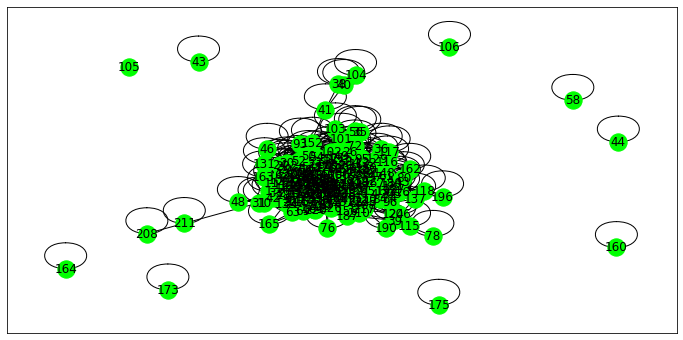

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [98]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.007081239557624263, 166),
 (0.006855354093555947, 71),
 (0.006756754916781593, 49),
 (0.006751681099439658, 138),
 (0.006265338124330302, 51),
 (0.0061174567786921, 214),
 (0.005842585721759464, 189),
 (0.005748619552724239, 32),
 (0.005705900908551891, 90),
 (0.005613834290221562, 79)]

In [99]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [100]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

콩쥐는 과실을 문 틈으로 죄다 들이밀고서야 안으로 들어갈 수 있었다.
하루는 계모 배씨가 콩쥐에게 새로운 일을 시키는 것이었다.
콩쥐는 그 말대로 물을 길어다 부었다.
그러자 염치도 없고 인사도 모르는 계모 배씨는 큰 마누라 본가 잔치에 무슨 체면으로 나서려는지 콩쥐는 젖혀 놓고 제가 먼저 날뛰는 것이었다.
관차가 그 말을 듣고 콩쥐를 불러 내어 신을 신어 보게 하자, 콩쥐가 부끄러워 낯을 붉히며 간신히 발을 내밀어 얌전한 발부리를 신짝 안에 들여 놓으니 살며시 쏙 들어가 맞는 것이었다.
콩쥐는 그 말을 듣더니 역시 마음이 움직이는 것이었다.
이 말을 둗자 감사는 늙은 남편인 자기를 부인이 사모함을 고맙게 여겨 여러 말로 위로하며 다만 얼굴이 변한 것만을 애석하게 여길 뿐, 사람이 바뀐 것은 전혀 깨닫지 못하는 것이었다.
그러자 그 때 노파의 집에 있던 콩쥐는 홀연히 온데간데없이 사라졌다.


**실습1**

In [101]:
grammar = """
 NP: {<DT|PP\$>?<JJ>*<NN>} 
 # chunk determiner/possessive, adjectives and noun
 {<NNP>+} # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
brown = nltk.corpus.brown
for sent in brown.tagged_sents():
  tree = cp.parse(sent)
  for subtree in tree.subtrees():
    if subtree.label() == 'NP': print(subtree)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
(NP coffee/NN)
(NP hell/NN)
(NP coffee/NN)
(NP filter/NN)
(NP pot/NN)
(NP waiter/NN)
(NP cold/JJ ham/NN)
(NP hot/JJ garlic/NN)
(NP bread/NN)
(NP Her/PP$ name/NN)
(NP bed/NN)
(NP coffee/NN)
(NP that/DT new/JJ toothbrush/NN)
(NP mirror/NN)
(NP my/PP$ purse/NN)
(NP my/PP$ immense/JJ relief/NN)
(NP subject/NN)
(NP sentence/NN)
(NP enthusiasm/NN)
(NP idea/NN)
(NP my/PP$ empty/JJ cup/NN)
(NP way/NN)
(NP scar/NN)
(NP her/PP$ stomach/NN)
(NP long/JJ thin/JJ line/NN)
(NP pink/JJ circle/NN)
(NP bullet/NN)
(NP cynicism/NN)
(NP bitter/JJ wisdom/NN)
(NP sex/NN)
(NP cabaret/NN)
(NP nice/JJ place/NN)
(NP smoke/NN)
(NP champagne/NN)
(NP sommelier/NN)
(NP wine/NN)
(NP magnum/NN)
(NP bottle/NN)
(NP tourist/NN)
(NP steely/JJ eye/NN)
(NP champagne/NN)
(NP her/PP$ bag/NN)
(NP her/PP$ way/NN)
(NP street/NN)
(NP day/NN)
(NP enormous/JJ sky/NN)
(NP delicate/JJ blue/NN)
(NP eye/NN)
(NP her/PP$ imagination/NN)
(NP stimulation/NN)
(NP city/NN)
(NP cypress/NN)
(NP pine/NN)
(NP 

**실습2**

In [102]:
from nltk import word_tokenize, pos_tag, ne_chunk

sentence = "James is working at Disney in London"
# 토큰화 후 품사 태깅
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [103]:
ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


In [104]:
import spacy
import en_core_web_sm

In [105]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(sentence)
tokenized = list(doc)
print(tokenized)

[James, is, working, at, Disney, in, London]


In [107]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(James, 'B', 'PERSON'), (is, 'O', ''), (working, 'O', ''), (at, 'O', ''), (Disney, 'B', 'ORG'), (in, 'O', ''), (London, 'B', 'GPE')]
